Desafio 16: Análise de Comportamento em um Site de Notícias

📂 Dataset: Log de acesso dos usuários do site, com as colunas:
ID_Usuario, Data_Acesso, Hora_Acesso, Sessao_ID, Secao_Visitada, Dispositivo, Tempo_Sessao_segundos

🎯 Atividades:

Qual é a média de tempo de sessão por tipo de dispositivo?

Qual seção do site teve maior tempo total de visualização?

Em qual período do dia (manhã, tarde, noite) há maior volume de acessos?

Quais são os 5 usuários com maior tempo total de sessão acumulado?

Crie um gráfico de barras mostrando a distribuição do número de acessos por seção visitada.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("dia_16_log_acesso_site.csv")
df.head()

,ID_Usuario,Data_Acesso,Hora_Acesso,Sessao_ID,Secao_Visitada,Dispositivo,Tempo_Sessao_segundos
0,U033,2024-01-18,09:30,S0001,Política,Desktop,84
1,U020,2024-01-03,02:45,S0002,Tecnologia,Mobile,185
2,U008,2024-01-04,20:30,S0003,Economia,Tablet,423
3,U012,2024-01-15,09:30,S0004,Política,Mobile,57
4,U042,2024-01-29,00:15,S0005,Tecnologia,Mobile,15


In [65]:
#Qual é a média de tempo de sessão por tipo de dispositivo?
tempoDispositivo = df.groupby("Dispositivo")["Tempo_Sessao_segundos"].mean()
print(f"{tempoDispositivo.apply(lambda x: f"{x:.0f} Minutos").to_string()}")

Dispositivo
Desktop    221 Minutos
Mobile     236 Minutos
Tablet     356 Minutos


In [24]:
#Qual seção do site teve maior tempo total de visualização?
secaoTempo = df.groupby("Sessao_ID")["Tempo_Sessao_segundos"].sum().sort_values(ascending=False)
print(f"A sessão do site que teve maior tempo de visualização foi: \n\n{secaoTempo.head(1).to_string()}")

A sessão do site que teve maior tempo de visualização foi: 

Sessao_ID
S0050    1582


In [53]:
#Em qual período do dia (manhã, tarde, noite) há maior volume de acessos?
df["Hora_Acesso"] = pd.to_datetime(df["Hora_Acesso"], format="%H:%M")
df["Hora"] = df["Hora_Acesso"].dt.hour

def tempoEmPeriodo(hora):
    if 6 <= hora < 12:
        return "Manhã"
    elif 12 <= hora < 18:
        return "Tarde"
    else:
        return "Noite"

df["Periodo_Dia"] = df["Hora"].apply(tempoEmPeriodo)

# Contar acessos por período
acessos = df["Periodo_Dia"].value_counts()
print(f"O período com maior volume de acessos foi a '{acessos.idxmax()}', com {acessos.max()} acessos")

O período com maior volume de acessos foi a 'Noite', com 61 acessos


In [56]:
#Quais são os 5 usuários com maior tempo total de sessão acumulado?
usuarioTempo = df.groupby("ID_Usuario")["Tempo_Sessao_segundos"].sum().sort_values(ascending=False)
print(f"Os 5 usuários com maior tempo de sessão acumulado são: \n\n{usuarioTempo.head(5)}")

Os 5 usuários com maior tempo de sessão acumulado são: 

ID_Usuario
U033    2143
U002    2121
U035    1950
U007    1483
U047    1332
Name: Tempo_Sessao_segundos, dtype: int64


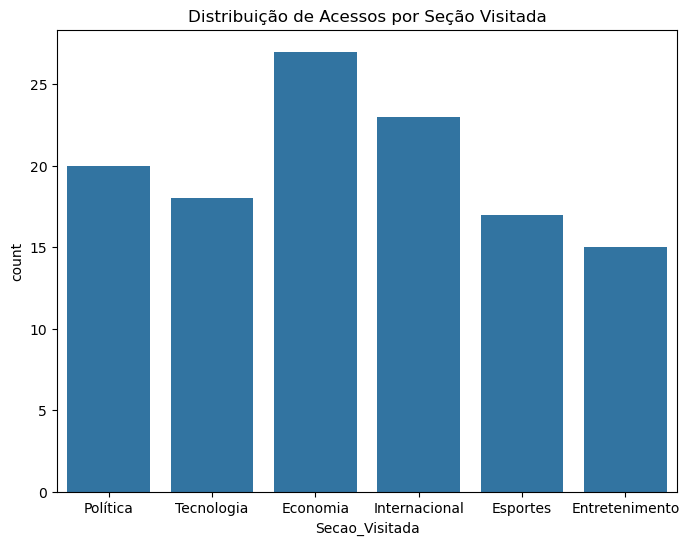

In [63]:
#Crie um gráfico de barras mostrando a distribuição do número de acessos por seção visitada.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Secao_Visitada')
plt.title('Distribuição de Acessos por Seção Visitada')
plt.show()